# <span style="color:red"><center>Conceptos básicos de regresión</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
5. Oleg Jarma, ojarmam@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Ejemplo: modelo lineal](#Ejemplo:-modelo-lineal)
* [Función de pérdida](#Función-de-pérdida)
* [Pérdida en entrenamiento vs pérdida en validación](#Pérdida-en-entrenamiento-vs-pérdida-en-validación)
* [Supuestos de Regresión](#Supuestos-de-Regresión)

## <span style="color:blue">Introducción</span>

En esta lección se introduce una de las máquinas de aprendizaje más conocida. La máquina de regresión.

En el caso más simple de un problema de regresión, lo que se busca es establecer una relación entre dos variables aleatorias. 

## <span style="color:blue">Ejemplo 1: Modelo lineal SIMPLE</span>

La gráfica presenta un conjunto de datos de entrenamiento de $ N = 11 $ puntos, que se muestran como círculos cafés, cada uno con una observación de la variable de entrada $ x $ junto con la variable objetivo correspondiente $ y $. 


Nuestro objetivo en este caso es entrenar una máquina de aprendizaje de tipo lineal, es decir, de la forma $y = ax+b$.


La curva azul muestra la función $y= 0.8431 x + 6.339$, la cual corresponde la modelo lineal entrenado para este conjunto de datos. El entrenamiento fue desarrollado usando la función *polyfit* de numpy.

El área sombreada corresponde a lo que los estadísticos llaman bandas de confianza. No entraremos en detalles, pero se espera que la mayor parte de los datos de entranamiento y validación queden dentro de tales bandas. Esta es una medida de la calidad de la máquina de aprendizaje. El gráfico muestra que las cosas no salieron muy bien. Esto es porque al parecer el comportamineto de los datos que no es lineal. 

Los datos de entrenamiento aparecen de color café y los datos de validación en color verde.

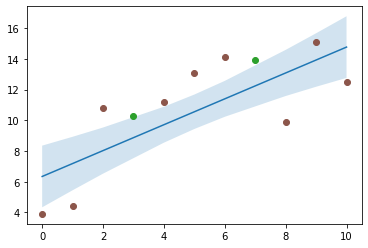

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x_train = np.array([0,1,2,4,5,6,8,9,10])
x_val =  np.array([3,7])

y_train =  np.array([3.9, 4.4, 10.8,  11.2, 13.1, 14.1,  9.9,  15.1, 12.5])
y_val =  np.array([10.3, 13.9])

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x_train, y_train, deg=1)
y_est = a * x_train + b
y_err = x_train.std() * np.sqrt(1/len(x_train) +
                          (x_train - x_train.mean())**2 / np.sum((x_train - x_train.mean())**2))

fig, ax = plt.subplots()
ax.plot(x_train, y_est, '-')
ax.fill_between(x_train, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x_train, y_train, 'o', color='tab:brown')
ax.plot(x_val, y_val, 'o', color='tab:green')

plt.show()


## <span style="color:blue">Ejemplo 2: Modelo lineal MÚLTIPLE</span>

El caso generalizado del anterior. En este caso no contamos sólo con una variable $x$ para explicar $y$. podemos pensar en 2, 3, 4.....Las que sean. suponiendo 4 variables, ahora queremos entrenar una máquina de aprendizaje "lineal" de la forma $y = ax_1 + bx_2 + cx_3 +dx_4 + e$

Este caso específico es complicado de mostrar de una forma gráfica, ya que cada variable es una dimensión nueva

<figure> 
<img src="../Imagenes/3d_regression.png" align="center"/> 
</figure>

## <span style="color:blue">Función de pérdida</span>  


Los valores de los coeficientes se determinarán ajustando el polinomio a la
datos de entrenamiento. Esto se puede hacer minimizando una función de pérdida que mide la
desajuste entre la función $f(x,\boldsymbol{w})$, para cualquier valor de  $\boldsymbol{w}$, y el conjunto de datos de entrenamiento.

Una opción simple de función de pérdida, que se usa ampliamente, viene dada por
el promedio de **los cuadrados de los errores** entre las predicciones  $f(x_n,\boldsymbol{w})$, que denotaremos por $\tilde{y}_n$,  y los correspondientes valores objetivo $y_n$, de tal manera que se minimice 


$$ECM(w) = \frac{1}{N} \sum_{n=1}^{N} [{f(x_n,\boldsymbol{w}) − y_n}]^2 = \frac{1}{N} \sum_{n=1}^{N} [{\tilde{y}_n − y_n}]^2$$, 

## <span style="color:blue">Pérdida en entrenamiento vs pérdida en validación</span> 

Los datos de validación se notaran respectivamente como $x_n^*$ y $y_n^*$. Los datos de entrenamiento no tienen ningún símbolo adicional.

Así, el ECM,en el modelo cuadrático para los datos de entrenamiento, luego de entrenada la máquina, es dado por

$$
ECM(w) = \frac{1}{9} \sum_{n=1}^{9} [{f(x_n,\boldsymbol{w}) − y_n}]^2 = \frac{1}{9} \sum_{n=1}^{9} [{\tilde{y}_n − y_n}]^2 = 3.1114
$$

Para los datos de validación se obtiene 


$$
ECM(w) = \frac{1}{2} \sum_{n=1}^{2} [{f(x_n^*,\boldsymbol{w}) − y_n^*}]^2 = \frac{1}{9} \sum_{n=1}^{2} [{\tilde{y}_n^* − y_n^*}]^2 = 0.0758
$$

Este resultado, no es realmente tan placentero. Genera dudas, debido a que se espera que el ECM de validación y el de entrenamiento sea similares. Aquí se puede sospechar que los datos de validación no fueron obtenidos adecuadamente. 

El siguiente código Python enseña como hacer los cálculos de esta sección.

In [12]:
# emc train data
y_est_train = a * x_train**2 + b *x_train + c
print (np.mean((y_train- y_est_train)**2))

# emc validation data
y_est_val = a * x_val**2 + b *x_val + c
print (np.mean((y_val- y_est_val)**2))

3.052278640749228
0.04602282952396599


## <span style="color:blue">Multicolinealidad</span> 

Cuando definimos una regresión estamos directamente diciendo que hay una relación entre las variables con las que predecimos y la variable predecimos. Pero no queremos que haya ninguna relación dentro de las variables explicativas. Este fenómeno en el que existe una relación entre dos (o más) variables $x_i$ se llama "colinealidad" y "multicolinealidad".

Esta tiene varias formas de descubrirse. La más sencilla es el obtener las correlaciones entre todas las variables. Si Tenemos altas correlaciones(ya bien sean positivas o negativas) tenemos potencialmente multicolinealidad.

¿Cómo podemos solucionarlo? El caso más sencillo es eliminar una de las variables con correlación. Esto no debería implicar un problema ya que una sola variable ya nos brinda suficiente información